In [698]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 5
beta = 3
N = 10
DIM = 2

#np.random.seed(2)

[[-1  1]
 [ 2  2]]


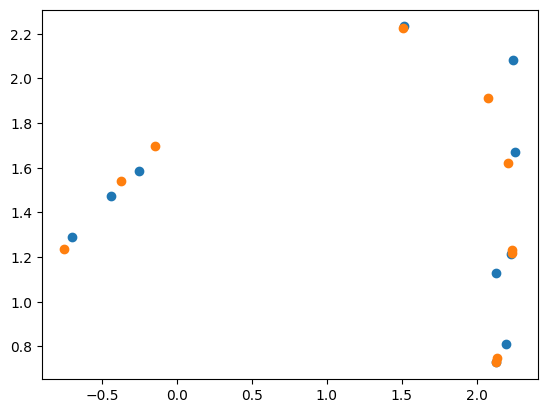

In [699]:
# Generate random points on the unit circle by sampling uniform angles
theta = np.random.uniform(0, 3*np.pi/4, (N,1))
eps_noise = 0.1 * np.random.normal(size=[N,1])
circle = np.hstack([np.cos(theta), np.sin(theta)])


# Stretch and rotate circle to an ellipse with random linear tranformation
B = np.random.randint(-3, 3, (DIM, DIM))
noisy_ellipse = circle.dot(B) + eps_noise
precise_ellipse = circle.dot(B)


print(B)
# Extract x coords and y coords of the ellipse as column vectors
X = noisy_ellipse[:,0:1]
#X = X[:len(X)/2]
Y = noisy_ellipse[:,1:]
#Y = Y[:len(Y)/2]

precise_X = precise_ellipse[:,0:1]
precise_Y = precise_ellipse[:,1:]

plt.scatter(X,Y)
plt.scatter(precise_X,precise_Y)

In [700]:
# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

The ellipse is given by 0.151x^2 + -0.308xy+0.0544y^2+0.18x+0.506y = 1


C:\Users\jeffs\AppData\Local\Temp\ipykernel_8108\3779069198.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


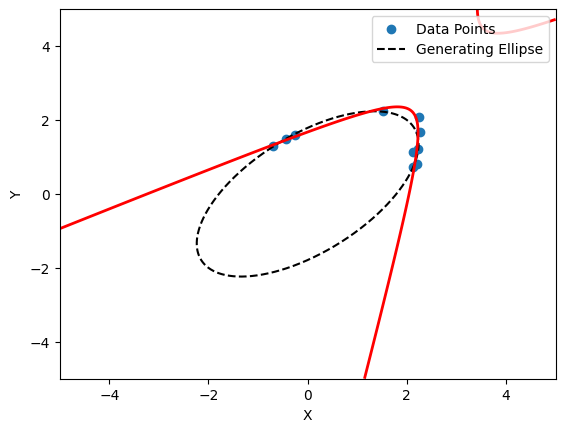

In [701]:
# Plot the noisy data
plt.scatter(X, Y, label='Data Points')

# Plot the original ellipse from which the data was generated
phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
c = np.hstack([np.cos(phi), np.sin(phi)])
ground_truth_ellipse = c.dot(B)
plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

# Plot the least squares ellipse
x_coord = np.linspace(-5,5,300)
y_coord = np.linspace(-5,5,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [702]:
print(X)

[[-0.43863462]
 [-0.25578311]
 [ 2.25631754]
 [ 2.12604635]
 [ 2.22540427]
 [ 2.1955211 ]
 [ 2.12930452]
 [-0.6967332 ]
 [ 2.24073765]
 [ 1.51525612]]


The ellipse is given by 0.001x^2 + 0.000xy + -0.000y^2 + -0.117x + 0.091y = 1


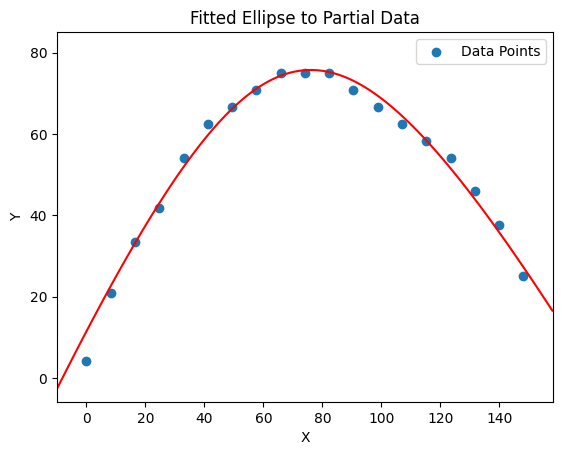

In [705]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = [(0.0, 4.17), (8.23, 20.84), (16.46, 33.34), (24.7, 41.67), (32.93, 54.17), (41.16, 62.51), (49.39, 66.67), (57.63, 70.84), (65.86, 75.01), (74.09, 75.01), (82.32, 75.01), (90.55, 70.84), (98.79, 66.67), (107.02, 62.51), (115.25, 58.34), (123.48, 54.17), (131.72, 45.84), (139.95, 37.5), (148.18, 25.0)]
data = np.array(data)
X = data[:, 0]
Y = data[:, 1]

# Formulate the design matrix
A = np.column_stack((X**2, X * Y, Y**2, X, Y))
b = np.ones_like(X)

# Solve the least squares problem
coefficients, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# Extract the coefficients
A_coeff = coefficients[0]
B_coeff = coefficients[1]
C_coeff = coefficients[2]
D_coeff = coefficients[3]
E_coeff = coefficients[4]

# Print the ellipse equation
print(f'The ellipse is given by {A_coeff:.3f}x^2 + {B_coeff:.3f}xy + {C_coeff:.3f}y^2 + {D_coeff:.3f}x + {E_coeff:.3f}y = 1')

# Plot the data points
plt.scatter(X, Y, label='Data Points')

# Create a grid for plotting the fitted ellipse
x_vals = np.linspace(min(X)-10, max(X)+10, 400)
y_vals = np.linspace(min(Y)-10, max(Y)+10, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = A_coeff * X_grid**2 + B_coeff * X_grid * Y_grid + C_coeff * Y_grid**2 + D_coeff * X_grid + E_coeff * Y_grid

# Plot the fitted ellipse
plt.contour(X_grid, Y_grid, Z_grid, levels=[1], colors='r')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Ellipse to Partial Data')
plt.show()